In [16]:
import os
import pandas as pd
from utils import dict_from_json
from experiment_parser_extended import MetaExperimentParser
import seaborn as sns
# import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from datasets.abaw3.config import AU_ORDER

pd.set_option('display.max_rows', None)


from datasets.bp4d.config import AU_ORDER
from pandas_utils import select_with_hp_dict

file = os.path.join("..", "experiments", "CVPR_Challenge", "AU_detection", "bp4d_disfa", "trainval.json") 
dictionary = dict_from_json(file)
experiment = MetaExperimentParser(dictionary)

storing_path = experiment.get_storing_path()
df = pd.read_csv(storing_path, header=[0, 1])

df_experiment = df.iloc[-1]
print(df_experiment)

tracking_df = pd.read_csv(df_experiment['meta', 'tracking'])
print(tracking_df.columns)

sns.lineplot(data=tracking_df, x='epoch', y='train_plbce', label='train')
sns.lineplot(data=tracking_df, x='epoch', y='eval_plbce', label='eval')
tracking_df.filter(regex='f1score')


FileNotFoundError: [Errno 2] No such file or directory: '/home/tallec/Thesis/results/CVPR_Challenge/AU_detection/bp4d_disfa/trainval.csv'

In [10]:
import datasets.disfa.config as disfa_conf
import datasets.bp4d.config as bp4d_conf
au_disfa_bp4d = sorted(set(["AU{}".format(au) for au in disfa_conf.AU_ORDER]) | set(bp4d_conf.AU_ORDER),
                       key=lambda x: int(x[2:]))

In [15]:
tracking_df[["eval_f1score_" + au for au in au_disfa_bp4d]].mean(axis=1)

0     0.346437
1     0.609211
2     0.616228
3     0.618060
4     0.640434
5     0.598693
6     0.601153
7     0.632169
8     0.634857
9     0.602994
10    0.632782
dtype: float64

In [9]:
import datasets.abaw3.config as abaw3_conf
print(abaw3_config)

au_subset = tracking_df[['eval_f1score_' + au for au in abaw3_conf.AU_ORDER]]
au_subset.mean(axis=1)

<module 'datasets.abaw3.config' from '/home/tallec/Thesis/src/datasets/abaw3/config.py'>


0     0.309870
1     0.472961
2     0.467017
3     0.462184
4     0.468563
5     0.488329
6     0.479813
7     0.487139
8     0.456229
9     0.463656
10    0.479900
dtype: float64

# Merge BP4D and disfa

In [1]:
from datasets.bp4d.config import BP4D_FOR_ABAW3
from datasets.disfa.config import DISFA_FOR_ABAW3

import pandas as pd


def get_disfa_video(path):
    return path.split('/')[-2]

def get_bp4d_video(path):
    return path.split('/')[-3]


disfa = pd.read_csv(DISFA_FOR_ABAW3).rename(columns={"prep_frames_path": "frame_path"})
bp4d = pd.read_csv(BP4D_FOR_ABAW3).rename(columns={"preprocessed_frames_path": "frame_path"})

disfa['video'] = disfa['frame_path'].map(get_disfa_video)
bp4d['video'] = bp4d['frame_path'].map(get_bp4d_video)

In [2]:
disfa_bp4d = pd.concat([disfa, bp4d], axis=0)

In [3]:
disfa_bp4d['video'].unique()

array(['SN001', 'SN002', 'SN003', 'SN004', 'SN005', 'SN006', 'SN007',
       'SN008', 'SN009', 'SN010', 'SN011', 'SN012', 'SN013', 'SN016',
       'SN017', 'SN018', 'SN021', 'SN023', 'SN024', 'SN025', 'SN026',
       'SN027', 'SN028', 'SN029', 'SN030', 'SN031', 'SN032', 'M003',
       'M015', 'M009', 'M011', 'M002', 'M017', 'M013', 'M008', 'M004',
       'M018', 'M014', 'M005', 'M007', 'M016', 'M010', 'M001', 'M012',
       'M006', 'F007', 'F011', 'F017', 'F016', 'F013', 'F004', 'F005',
       'F002', 'F012', 'F019', 'F009', 'F014', 'F020', 'F018', 'F006',
       'F008', 'F023', 'F003', 'F022', 'F015', 'F001', 'F021', 'F010'],
      dtype=object)

In [5]:
import numpy as np
valid_videos = np.concatenate([np.random.choice(a=bp4d['video'].unique(), size=(6, ), replace=False),
                               np.random.choice(a=disfa['video'].unique(), size=(4, ), replace=False)])
train_videos = [video for video in disfa_bp4d['video'].unique() if video not in valid_videos]

In [14]:
import os

train_disfa_bp4d = disfa_bp4d[disfa_bp4d['video'].isin(train_videos)]
train_disfa_bp4d
(train_disfa_bp4d
 .drop(columns='video')
 .to_csv(os.path.join('..', 'resources', 'ABAW3', 'preprocessed', 'train_disfa_bp4d.csv'), index=False))

In [15]:
valid_disfa_bp4d = disfa_bp4d[disfa_bp4d['video'].isin(valid_videos)]
(valid_disfa_bp4d
 .drop(columns='video')
 .to_csv(os.path.join('..', 'resources', 'ABAW3', 'preprocessed', 'valid_disfa_bp4d.csv'), index=False))

In [16]:
(disfa_bp4d
 .drop(columns='video')
 .to_csv(os.path.join('..', 'resources', 'ABAW3', 'preprocessed', 'disfa_bp4d.csv'), index=False))

In [1]:
from datasets.au_merge.generation import gen_bp4d_disfa

[0, 1, 2, 12, 3, 4, 12, 5, 6, 12, 7, 12, 12, 8, 9, 10, 11]


In [8]:
bp4d_disfa = gen_bp4d_disfa(mode='valid',
                            batchsize=32,
                            subsample=500)
img, labels = next(iter(bp4d_disfa))
img_np = img.numpy()

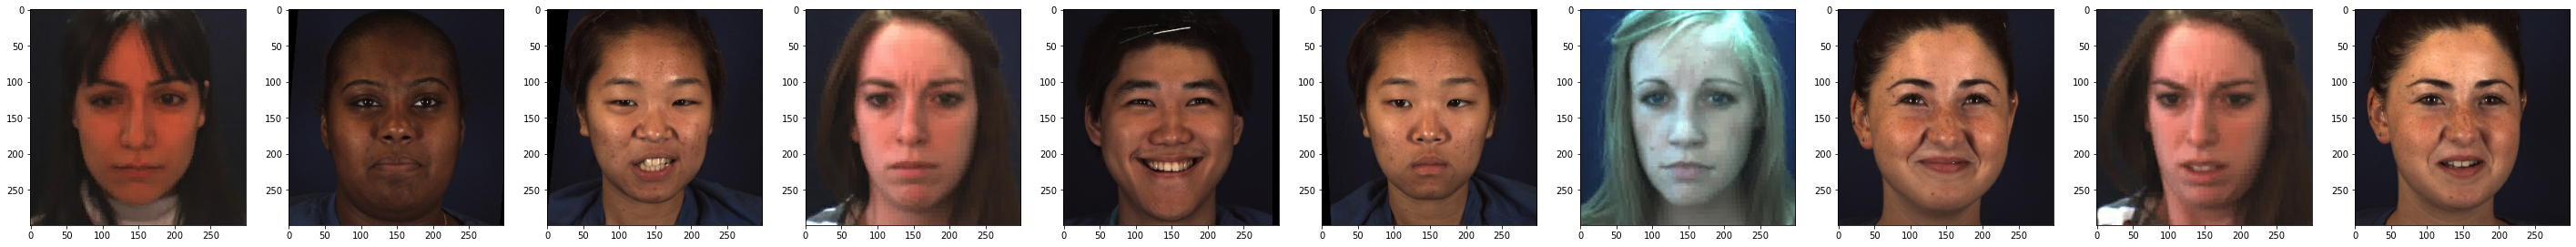

In [9]:
import matplotlib.pyplot as plt

N = 10
fig, axes = plt.subplots(ncols=N, figsize=(50, 5))
for i in range(N):
    axes[i].imshow(img_np[i])